# Sklearn 决策树学习
DecisionTreeClassifier 特征选择参数
criterion 可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。

[0]
[[ 1.  0.  0.]]


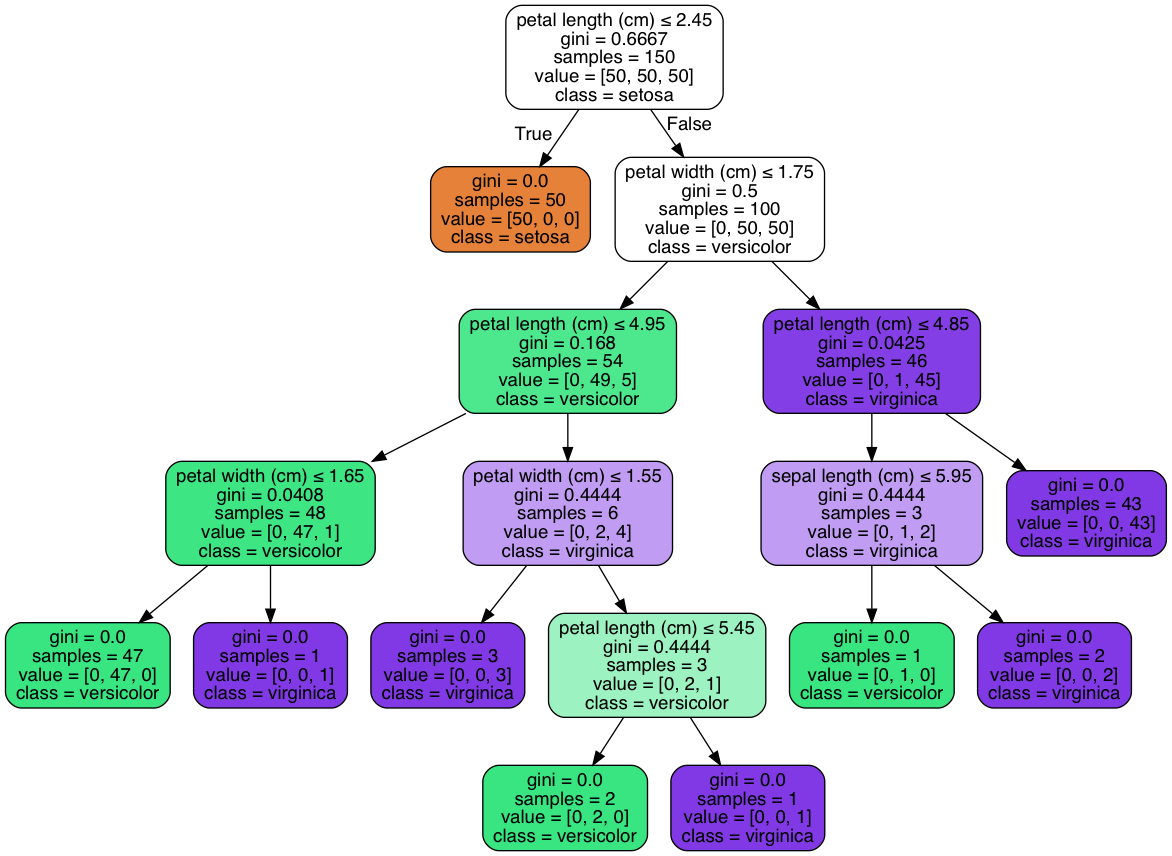

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)


# print type(iris)
# print dir(iris)
# print iris.data
# print iris.target
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(iris.data, iris.target)

print clf.predict(iris.data[:1, :])
print clf.predict_proba(iris.data[:1, :])

from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
 

tree.export_graphviz(clf, out_file=dot_data, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# sklearn_pandas 练习

In [13]:
import random
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

# transformers for category variables
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# transformers for numerical variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# transformers for combined variables
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# user-defined transformers
from sklearn.preprocessing import FunctionTransformer

# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn.metrics import scorer


testdata = pd.DataFrame({'pet': ['cat', 'dog', 'dog', 'fish','cat', 'dog', 'cat', 'fish'],
                         'age': [4., 6, 3, 3, 2, 3, 5, 4],
                         'gender': ['male', 'female', 'female', 'male','male', 'female', 'male', 'female'],
                         'salary': [90,24,44,27,32,59,36,27]})

mapper = DataFrameMapper([ ('pet', LabelEncoder()),
                           ('age', MinMaxScaler()),
                           ('gender', LabelBinarizer()),
                           ('salary',None),
                         ])
testdata = mapper.fit_transform(testdata)

print testdata

[[  0.     0.5    1.    90.  ]
 [  1.     1.     0.    24.  ]
 [  1.     0.25   0.    44.  ]
 [  2.     0.25   1.    27.  ]
 [  0.     0.     1.    32.  ]
 [  1.     0.25   0.    59.  ]
 [  0.     0.75   1.    36.  ]
 [  2.     0.5    0.    27.  ]]


/Users/erwin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/erwin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


# 玩玩ITchat 
微信好友数据分析和统计

In [ ]:
import itchat

itchat.login()
friends = itchat.get_friends(update=True)[0:]

print friends

Getting uuid of QR code.
Please scan the QR code to log in.


# 决策树练习
参考：https://www.leiphone.com/news/201707/WYsS1Qebkc80axky.html

In [5]:
import pandas as pd
df = pd.read_csv('data/loans.csv')
df.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


In [6]:
df.shape

(46508, 13)

In [7]:
X = df.drop('safe_loans', axis=1)
y = df.safe_loans

In [11]:
print X.dtypes
X.head()

grade                     object
sub_grade                 object
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none      int64
revol_util               float64
total_rec_late_fee       float64
dtype: object


,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
X_trans = X.apply(lambda x: d[x.name].fit_transform(x))
X_trans.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,2,13,1,1,3,97,0,1,1,1,107,0
1,5,26,0,5,2,552,9,1,1,1,349,0
2,1,9,1,1,3,1805,8,1,1,1,388,0
3,2,10,1,1,3,1005,2,0,1,1,952,0
4,1,6,0,4,3,703,8,0,1,1,583,0
